In [1]:
import numpy as np
import pandas as pd
import math
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multinomial
from typing import List
import seaborn as sns

# extraction optimisation routine ##

## this routine simulates optimal firm extraction behaviour under markov ECM ##

## define stage and state characetristics 

class State: 
    def __init__(self,mean,eta,lambda_switch,sigma):
        self.m = mean
        self.e = eta 
        self.l = lambda_switch
        self.s = sigma
        
state_1 = State(75,0.44,0.26,0.23)
state_2 = State(30,1.05,0.28,0.44)

## E => daily extraction, Pt => price for day t, vc and fc => variable and fixed costs ## 

## pi_tax => corporate rate, c_tax => carbon tax ##

def profit_t(E,Pt,vc,fc,pi_tax,c_tax):
    pi = ((E*(Pt-vc-c_tax))-fc)*(1-pi_tax)
    return pi

## T => days of extraction remaining, r => effective daily interest rate ##

def value_simple(T,r,pi):
    v = pi*(math.exp(-r*T))*(1/r)
    return v

[-6800000.0, -5600000.0, -4400000.0, -3200000.0, -2000000.0, -800000.0, 400000.0, 1600000.0, 2800000.0, 4000000.0, 5200000.0, 6400000.0, 7600000.0, 8800000.0, 10000000.0, 11200000.0, 12400000.0, 13600000.0, 14800000.0, 16000000.0, 17200000.0, 18400000.0, 19600000.0, 20800000.0, 22000000.0, 23200000.0, 24400000.0, 25600000.0, 26800000.0, 28000000.0, 29200000.0, 30400000.0, 31600000.0, 32800000.0, 34000000.0, 35200000.0, 36400000.0, 37600000.0, 38800000.0, 40000000.0, 41200000.0, 42400000.0, 43600000.0, 44800000.0, 46000000.0, 47200000.0, 48400000.0, 49600000.0]


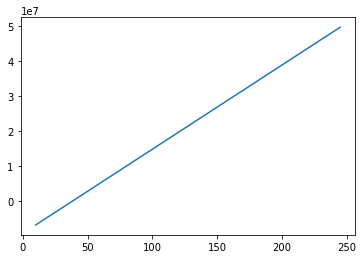

In [8]:
prices = list(range(10,250,5))
s0 = list(range(50,500,5))

pi_p=[]
for i in prices:
    profit = profit_t(300000,i,20,1000000,0.2,15)
    pi_p.append(profit)

print(pi_p)
plt.plot(prices,pi_p)

[-76385923.89992766, -62906054.97641102, -49426186.05289437, -35946317.12937772, -22466448.205861077, -8986579.28234443, 4493289.641172215, 17973158.56468886, 31453027.48820551, 44932896.41172215, 58412765.33523881, 71892634.25875545, 85372503.1822721, 98852372.10578874, 112332241.02930538, 125812109.95282204, 139291978.8763387, 152771847.79985532, 166251716.72337198, 179731585.6468886, 193211454.57040527, 206691323.4939219]


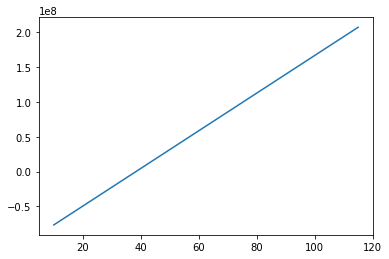

In [7]:
v_p=[]
for i in pi_p:
    value = value_simple(20,0.04,i)
    v_p.append(value)

print(v_p)
plt.plot(prices,v_p)

In [ ]:
class Stage: 
    def __init__(self,cost,extract):
        self.c = cost
        self.E = extract